In [312]:
from numpy import zeros, exp, pi,linspace,sin,cos,real, imag,arange,kaiser,hamming
from pylab import plot, show,xlim,xlabel,ylabel

In [339]:
def dft(y):
    N=len(y)
    
    c=zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*exp(-2j*pi*k*n/N)
    return c

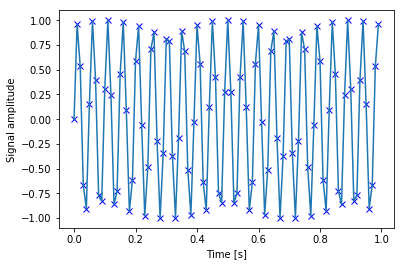

In [378]:
f = 20.5 # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second
Number_samples=100
sample_time=1/f_s
t = arange(0, Number_samples*sample_time, sample_time)
x = sin(f*2*pi*t)
#x=exp(-(t-.5)**2/.01)
#x=sin(f*2*pi*(t-.5))/(f*2*pi*(t-.5+.000001))
plot(t, x,"bx")
plot(t,x)
xlabel('Time [s]')
ylabel('Signal amplitude')
show()


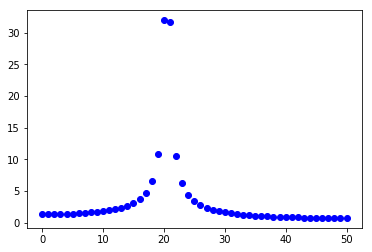

51

In [379]:
ft=dft(x)
f=linspace(0, f_s/2,Number_samples//2+1)
plot(f,abs(ft),"bo")
show()
len(ft)

Play around and change the function: change phase, frequency, etc. Change from sine to cosine or other functions. Use ft.real and ft.imag to see the complex coefficients.

What happens when you put in a frequency that isn't an integer?

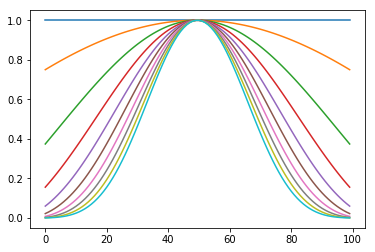

In [284]:
N = 10
beta_max = 10
for beta in linspace(0, beta_max, N):
    plot(kaiser(100, beta))
    
show()

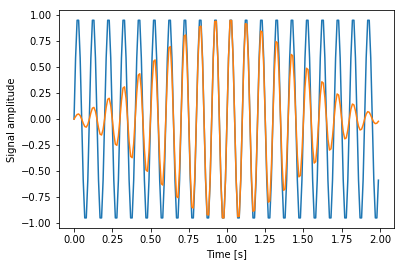

In [408]:
f = 10 # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second
Number_samples=200
sample_time=1/f_s
t = arange(0, Number_samples*sample_time, sample_time)
x = sin(f*2*pi*t)
xwindow=x*kaiser(len(t),5)
#xwindow=x*hamming(len(t))
plot(t, x)
plot(t,xwindow)
xlabel('Time [s]')
ylabel('Signal amplitude')
show()

In [390]:
ft=dft(x)
ftwin=dft(xwindow)
f=linspace(0, f_s/2,Number_samples//2+1)
#ignore f1=fftpack.fftfreq(Number_samples)*f_s

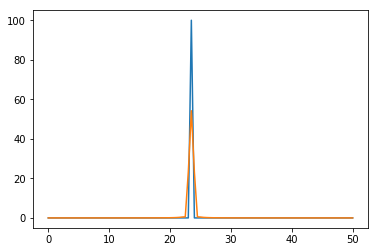

In [388]:
plot(f,abs(ft))
#ignore plot(f1[:Number_samples//2+1],abs(ftwin),"bx")
plot(f,abs(ftwin))

show()

Taking too long. Use FFT

In [193]:
from scipy import fftpack

In [194]:
help(fftpack)

Help on package scipy.fftpack in scipy:

NAME
    scipy.fftpack

DESCRIPTION
    Discrete Fourier transforms (:mod:`scipy.fftpack`)
    
    Fast Fourier Transforms (FFTs)
    
    .. autosummary::
       :toctree: generated/
    
       fft - Fast (discrete) Fourier Transform (FFT)
       ifft - Inverse FFT
       fft2 - Two dimensional FFT
       ifft2 - Two dimensional inverse FFT
       fftn - n-dimensional FFT
       ifftn - n-dimensional inverse FFT
       rfft - FFT of strictly real-valued sequence
       irfft - Inverse of rfft
       dct - Discrete cosine transform
       idct - Inverse discrete cosine transform
       dst - Discrete sine transform
       idst - Inverse discrete sine transform
    
    Differential and pseudo-differential operators
    
    .. autosummary::
       :toctree: generated/
    
       diff - Differentiation and integration of periodic sequences
       tilbert - Tilbert transform:         cs_diff(x,h,h)
       itilbert - Inverse Tilbert transform: s

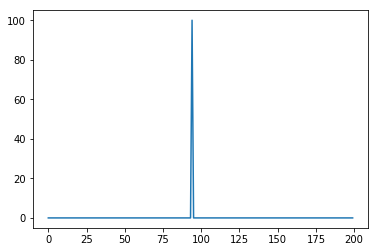

In [402]:
fft=fftpack.rfft(x)
plot(abs(fft))
show()

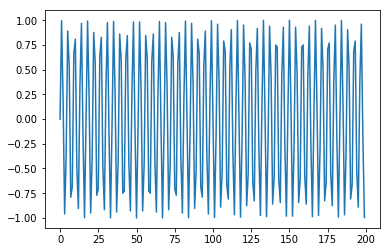

In [403]:
ifft=fftpack.irfft(fft)
plot(x)
show()

In [401]:
fftpack.fftfreq(Number_samples)

array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,
        0.04 ,  0.045,  0.05 ,  0.055,  0.06 ,  0.065,  0.07 ,  0.075,
        0.08 ,  0.085,  0.09 ,  0.095,  0.1  ,  0.105,  0.11 ,  0.115,
        0.12 ,  0.125,  0.13 ,  0.135,  0.14 ,  0.145,  0.15 ,  0.155,
        0.16 ,  0.165,  0.17 ,  0.175,  0.18 ,  0.185,  0.19 ,  0.195,
        0.2  ,  0.205,  0.21 ,  0.215,  0.22 ,  0.225,  0.23 ,  0.235,
        0.24 ,  0.245,  0.25 ,  0.255,  0.26 ,  0.265,  0.27 ,  0.275,
        0.28 ,  0.285,  0.29 ,  0.295,  0.3  ,  0.305,  0.31 ,  0.315,
        0.32 ,  0.325,  0.33 ,  0.335,  0.34 ,  0.345,  0.35 ,  0.355,
        0.36 ,  0.365,  0.37 ,  0.375,  0.38 ,  0.385,  0.39 ,  0.395,
        0.4  ,  0.405,  0.41 ,  0.415,  0.42 ,  0.425,  0.43 ,  0.435,
        0.44 ,  0.445,  0.45 ,  0.455,  0.46 ,  0.465,  0.47 ,  0.475,
        0.48 ,  0.485,  0.49 ,  0.495, -0.5  , -0.495, -0.49 , -0.485,
       -0.48 , -0.475, -0.47 , -0.465, -0.46 , -0.455, -0.45 , -0.445,
      

In [404]:
from numpy.random import normal

In [405]:
random=normal(0,1,Number_samples)

In [432]:
signal=x+random

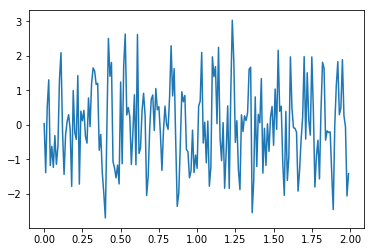

In [433]:
plot(t,signal)
#plot(t,x)

In [434]:
signal_fft=fftpack.rfft(signal)

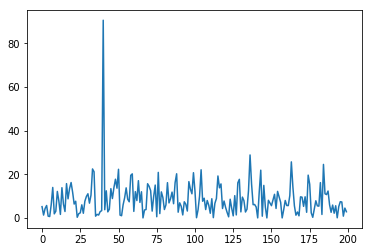

In [435]:
plot(abs(signal_fft))

In [436]:
for i in range(150):
    signal_fft[50+i]=0
for i in range(20):
    signal_fft[i]=0

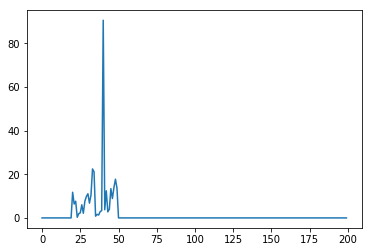

In [437]:
plot(abs(signal_fft))

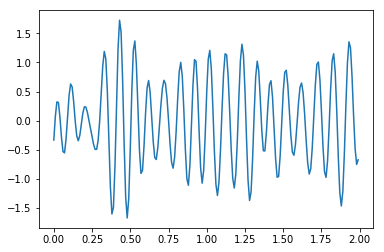

In [438]:
plot(t,fftpack.irfft(signal_fft))


In [283]:
from skimage import io
image = io.imread('elsp_0410.png')
M, N = image.shape

f, ax = plt.subplots(figsize=(4.8, 4.8))
ax.imshow(image)

print((M, N), image.dtype)

ValueError: too many values to unpack (expected 2)